In [13]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
url = "web_scraper/no_games.csv"
df = pd.read_csv(url)
df.head(15)

,actor,movie_or_TV_name
0,Chie Nakamura,Boruto: Naruto Next Generations
1,Chie Nakamura,The World's Finest Assassin Gets Reincarnated ...
2,Chie Nakamura,Jujutsu Kaisen
3,Chie Nakamura,Dororo
4,Chie Nakamura,Ace Attorney
5,Chie Nakamura,Devilman: Crybaby
6,Chie Nakamura,Vatican Miracle Examiner
7,Chie Nakamura,Naruto: Shippûden
8,Chie Nakamura,The Day Naruto Became Hokage
9,Chie Nakamura,Tokyo Ghoul: Pinto


In [3]:
G = nx.from_pandas_edgelist(df.iloc[0:350], 
                             source = "movie_or_TV_name", 
                             target = "actor", 
                             edge_attr=None, 
                             create_using=nx.DiGraph())

In [4]:
to_be_removed = [x for  x in G.nodes() if G.degree(x) <= 1]

In [5]:
to_be_removed[0:5]

["The World's Finest Assassin Gets Reincarnated in Another World as an Aristocrat",
 'Jujutsu Kaisen',
 'Ace Attorney',
 'Devilman: Crybaby',
 'Vatican Miracle Examiner']

In [6]:
for x in to_be_removed:
    G.remove_node(x)

In [7]:
colors = []
for node in G:
    if node in df["actor"].values:
        colors.append("lightblue") # Actor
    else: colors.append("red") # Project Title

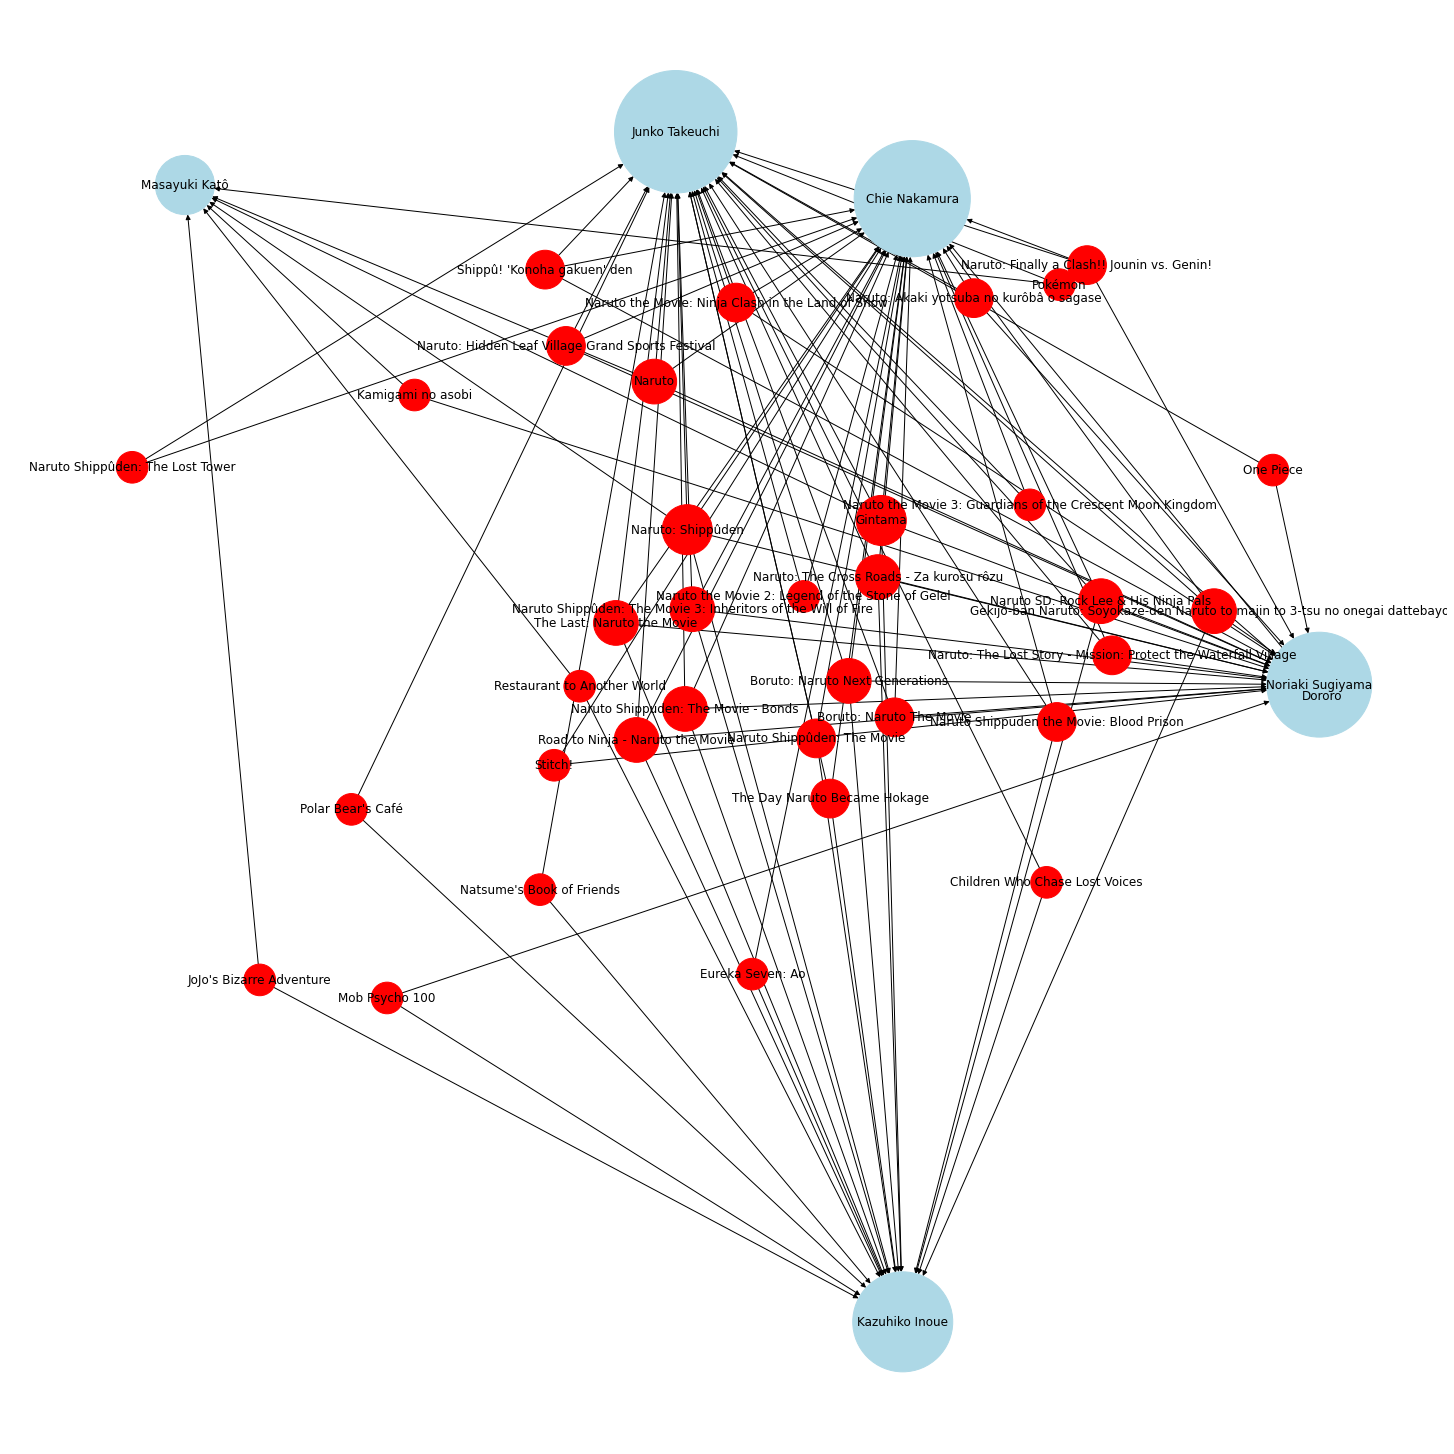

In [23]:
deg = G.degree()
plt.figure(figsize=(20, 20))
layout = nx.layout.fruchterman_reingold_layout(G, k=5/math.sqrt(G.order()))
nx.draw(G, layout,
        with_labels=True, 
        node_color = colors,
        node_size  = [500*deg[i] for i in G.nodes()])